# Timelapse by hand
We will practise how to analyse timelapse data by hand inversion using the ERTManager.
Hypothetical scenario is a tracer injection into a shallow aquifer.

First we do some modelling:
1. Generate a synthetic model 
1. do a forward calculation with gradient data - baseline data0
2. Introduce a conductive body and compute data1
3. Invert this data set using different methods
3. Visualize the change between the two simulations 
4. Move the block in the model or enlarge it, create new data `data2` and work with it.

In [1]:
# first all the imports
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

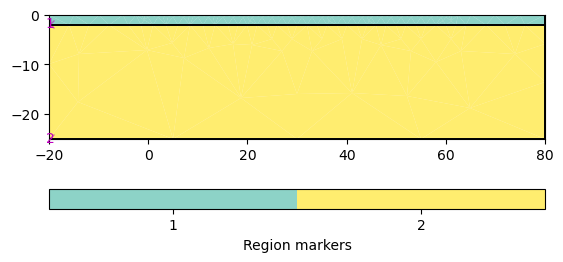

In [18]:
# baseline
world = mt.createWorld(start=[-20, 0], end=[80, -25], layers=[-2])
ex = np.arange(60.1)
# The electrodes are added to a mesh along with a refinement point
for xi in ex:
    world.createNode([xi, 0])
    world.createNode([xi, -0.4])
pg.show(world);

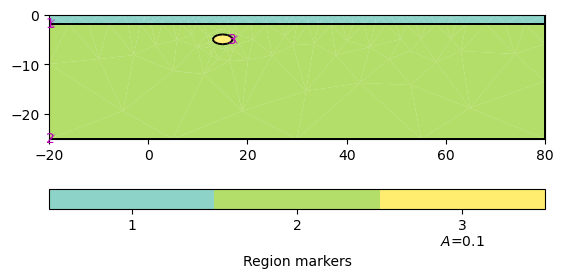

In [19]:
# First time step
blop = mt.createCircle(pos=[15, -5], radius=[2, 1], marker=3, area=0.1)
geo1 = world + blop
pg.show(geo1);

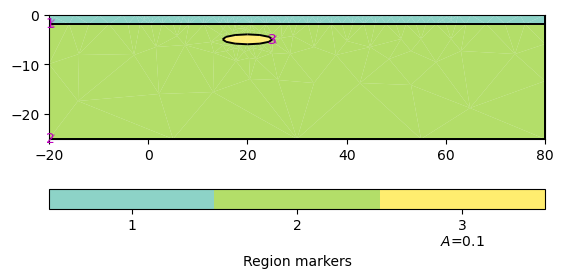

In [20]:
blop2 = mt.createCircle(pos=[20, -5], radius=[5, 1], marker=3, area=0.1)
geo2 = world + blop2
pg.show(geo2);

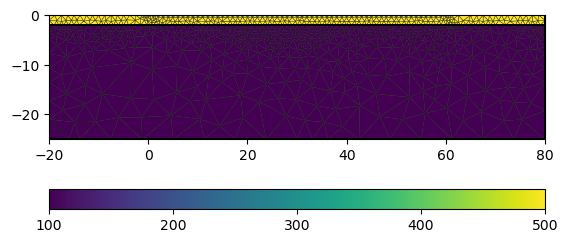

In [21]:
rhobase = [[1, 500], [2, 100]]
mesh = mt.createMesh(world, quality=34.4)
pg.show(mesh, rhobase, showMesh=True);

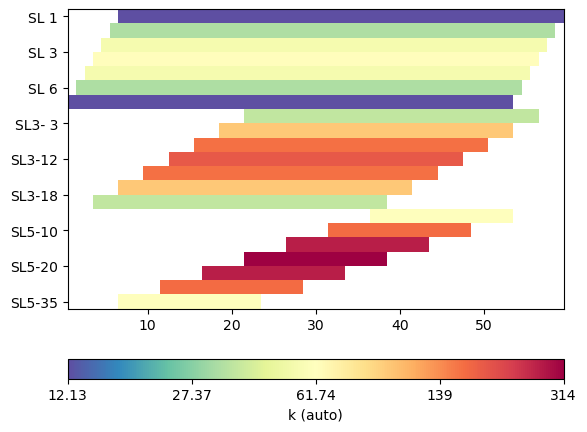

In [22]:
scheme = ert.createData(elecs=ex, schemeName='gr')
scheme['k'] = ert.geometricFactors(scheme)
ert.show(scheme, 'k')
error = 0.02

Data error estimate (min:max)  0.020002599431207104 : 0.020305203867826045


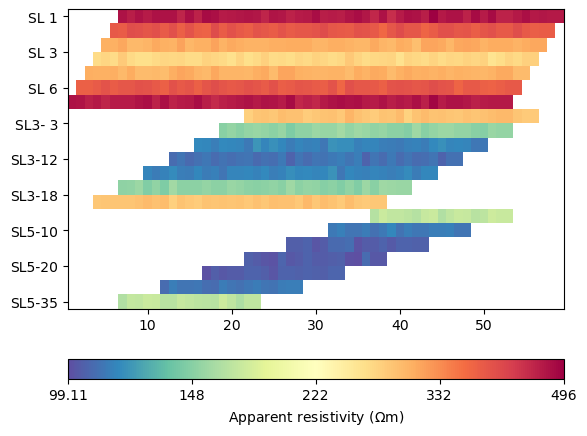

In [23]:
data = ert.simulate(mesh, scheme=scheme, res=rhobase, noiseLevel=error)
ert.show(data);

Data error estimate (min:max)  0.020002588645124074 : 0.020326496582009836


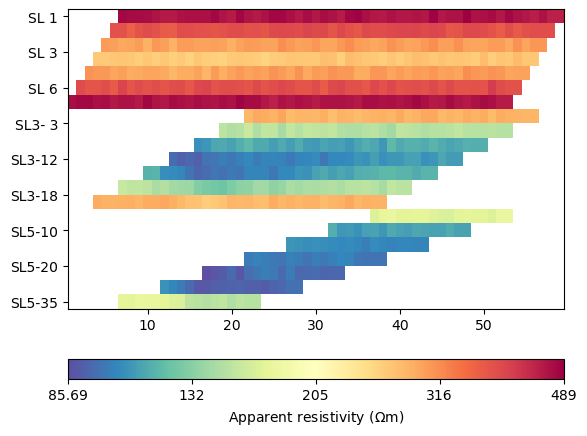

In [24]:
mesh = mt.createMesh(geo1, quality=34.4)
rhotime = rhobase + [[3, 5]]
data1 = ert.simulate(mesh, scheme=scheme, res=rhotime, noiseLevel=error)
ert.show(data1);

Data error estimate (min:max)  0.02000258881620655 : 0.02053756132509313


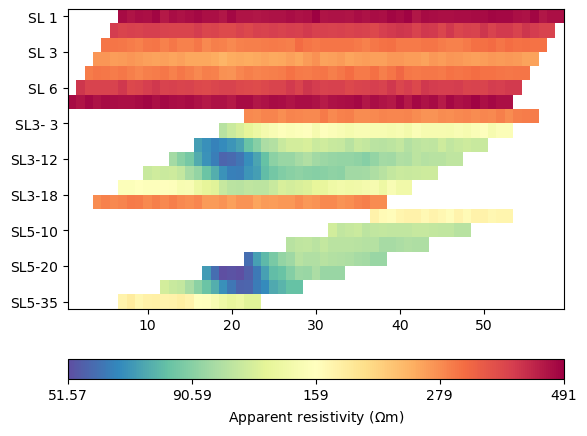

In [25]:
mesh = mt.createMesh(geo2, quality=34.4)
data2 = ert.simulate(mesh, scheme=scheme, res=rhotime, noiseLevel=error)
ert.show(data2);

Now we do some inversion using the ERT manager.

07/06/23 - 15:57:23 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 15:57:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 15:57:23 - pyGIMLi - INFO - Found 2 regions.
07/06/23 - 15:57:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
07/06/23 - 15:57:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
07/06/23 - 15:57:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
07/06/23 - 15:57:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2761 Cells: 5200 Boundaries: 4060
07/06/23 - 15:57:23 - pyGIMLi - INFO - Use median(data values)=283.54328929990163
07/06/23 - 15:57:23 - pyGIMLi - INFO - Created startmodel from forward operator: 1018 [283.54328929990163,...,283.54328929990163]
07/06/23 - 15:57:23 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A9AD84A8B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD84A9F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD8A2820>
min/max (data): 99.11/496
min/max (error): 2%/2.03%
min/max (start model): 284/284
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 7.12 (dPhi = 99.0%) lam: 100
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.7 (dPhi = 67.86%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.9 (dPhi = 29.9%) lam: 100.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.90)                   #
###########

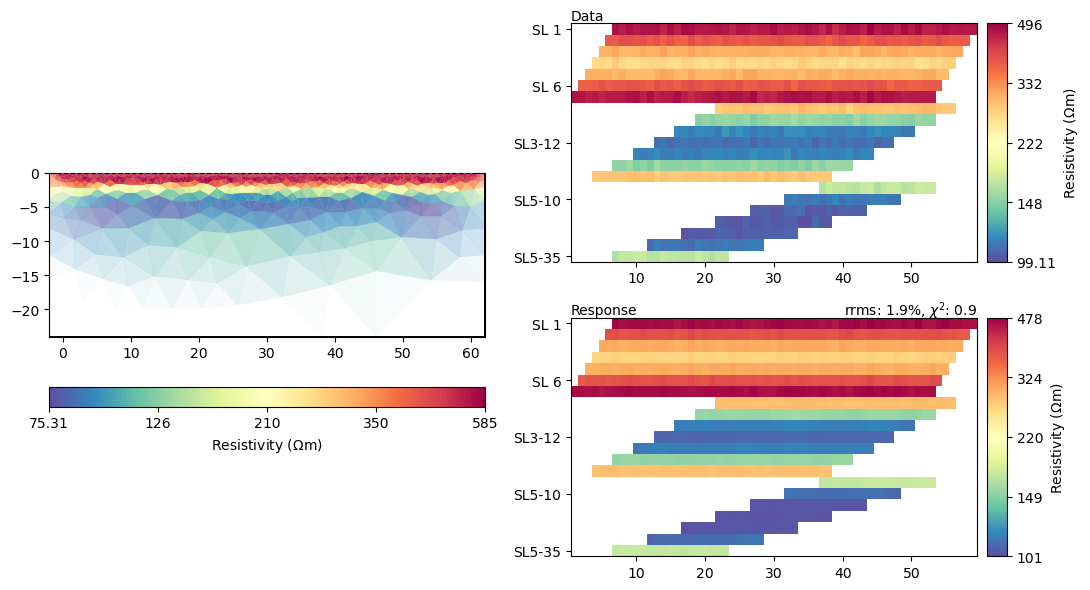

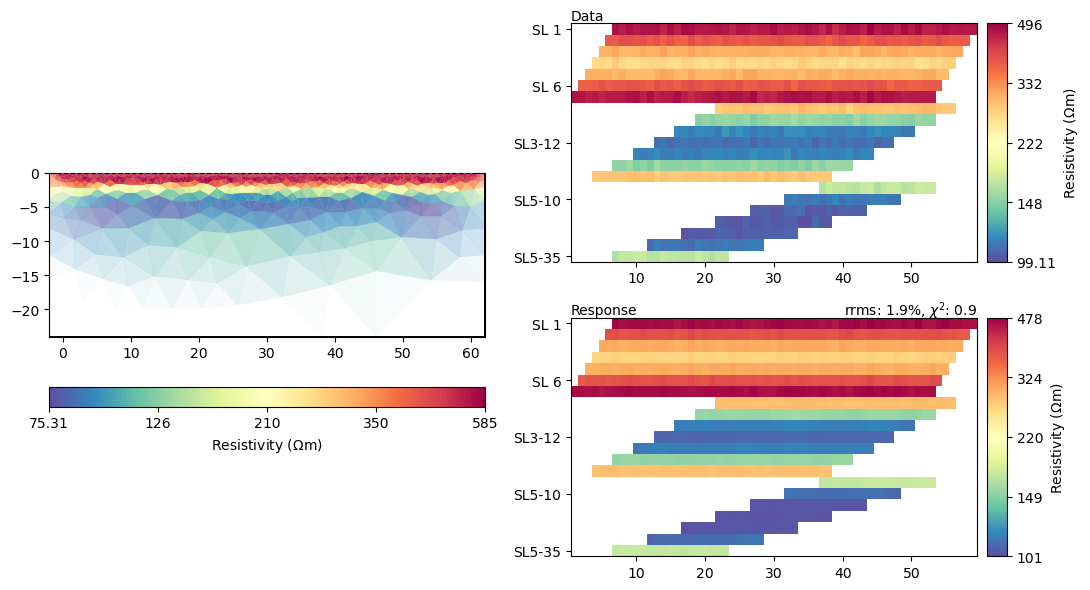

In [28]:
mgr = ert.Manager()
mgr.invert(data, lam=100, zWeight=0.3, verbose=True)
mgr.showResultAndFit()

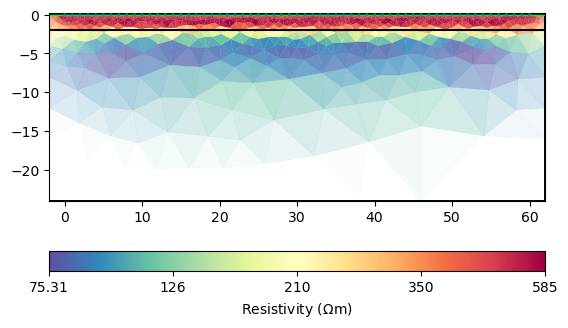

In [30]:
ax, cb = mgr.showResult()
pg.viewer.mpl.drawPLC(ax, world, fillRegion=False, fitView=False);

In [31]:
model0 = mgr.model.copy()

In [42]:
mgr.invert(data1, lam=100, zWeight=0.3, verbose=True)

07/06/23 - 16:07:11 - pyGIMLi - INFO - Use median(data values)=281.9250564866253
07/06/23 - 16:07:11 - pyGIMLi - INFO - Created startmodel from forward operator: 1018 [281.9250564866253,...,281.9250564866253]
07/06/23 - 16:07:11 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A9AD84A8B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD84A9F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A9C5433EE0>
min/max (data): 85.69/489
min/max (error): 2%/2.03%
min/max (start model): 282/282
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 8.37 (dPhi = 99.05%) lam: 100
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.71 (dPhi = 78.65%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.89 (dPhi = 44.87%) lam: 100.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.89)                   #
#######

1018 [544.9132333905118,...,99.71228965083041]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1a9c55ee250>)

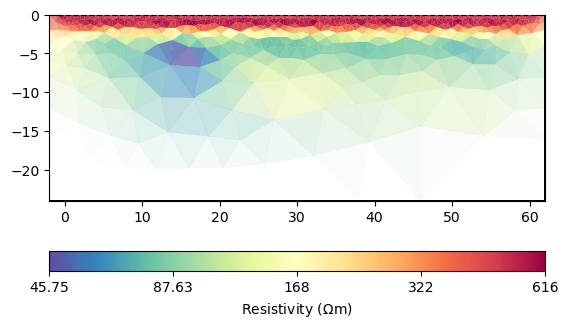

In [43]:
mgr.showResult()

Mostly we are interested in the difference (change) between the models. As we mostly use the logarithm of resistivity as model ($m=\log\rho$), the difference of the models is essentially the resistivity ratio, again looked at with a logarithmic eye:
$$\Delta m = m^2 - m^1 = \log\rho^2 - \log\rho^1 = \log\frac{\rho^2}{\rho^1}$$
We therefore compute the ratio and show it logarithmically with 1 in the middle:

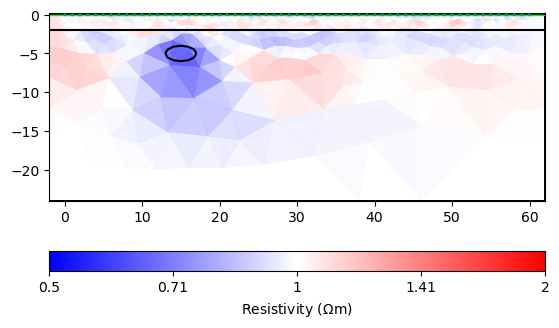

In [44]:
ratio = mgr.model / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo1, fillRegion=False, fitView=False);

Inversion results show artifacts and taking the difference. We mighty use the first result as starting model:

07/06/23 - 16:07:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A9AD84A8B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD84A9F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A9C57391C0>
min/max (data): 85.69/489
min/max (error): 2%/2.03%
min/max (start model): 75.31/585
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.09 (dPhi = 84.96%) lam: 25
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.79 (dPhi = 26.64%) lam: 25.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.79)                   #
################################################################################


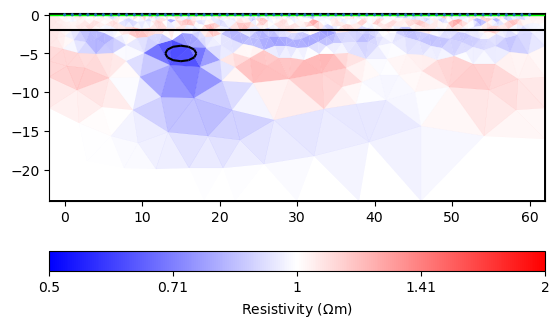

In [45]:
mgr.invert(data1, lam=25, startModel=model0, verbose=True)
ratio = mgr.model / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo1, fillRegion=False, fitView=False);

However, this does almost not show any change. As the next step, we use is also as a reference so that instead of the model roughness $\Phi_m=\|C m\|^2_2$, the difference of the models is constrained
$$ \Phi_m = \|C (m^1 - m^0) \|_2^2 = \|C \log\frac{\rho^1}{\rho^0} \|_2^2 \rightarrow\min $$
As this vector is much smaller, we can use a higher regularization strength:

07/06/23 - 16:07:35 - pyGIMLi - INFO - Starting inversion.
07/06/23 - 16:07:35 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A9AD84A8B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD84A9F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A9C277A0A0>
min/max (data): 85.69/489
min/max (error): 2%/2.03%
min/max (start model): 75.31/585
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.04 (dPhi = 84.18%) lam: 400
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.01 (dPhi = 2.85%) lam: 400.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.0 (dPhi = 0.1%) lam: 400.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.0 (dPhi = 0.0%) lam: 400.0
#########################################

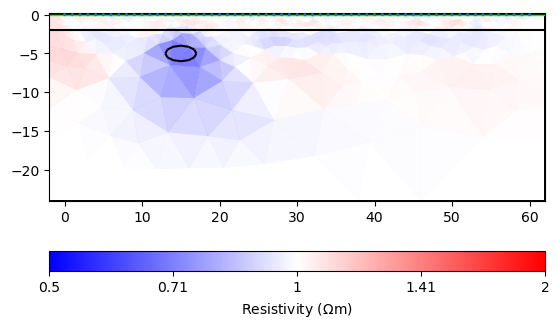

In [46]:
mgr.invert(data1, lam=400, startModel=model0, isReference=True, verbose=True)
ratio = mgr.model / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo1, fillRegion=False, fitView=False);

array([<Axes: >, <Axes: >], dtype=object)

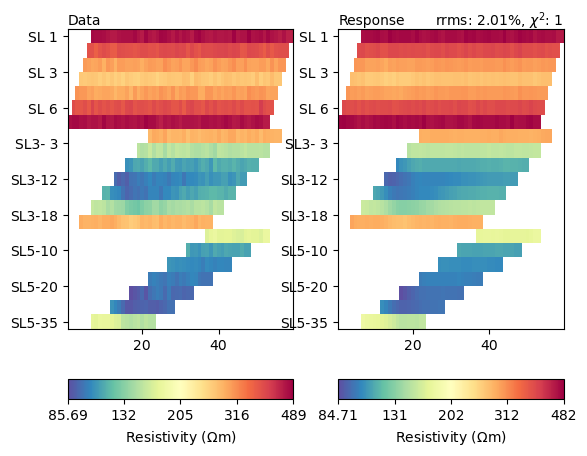

In [49]:
mgr.showFit()

and obtain a result with much less artifacts. Again, we store a copy.

In [47]:
model1 = mgr.model.copy()

In case there are systematic errors in both inversions, one can think of the so-called "difference inversion" (LaBrecque & Yang, 2001). It extends regularizing the difference in the model to the data, i.e. to invert only the differences in the data. This leads to removing the misfit of the reference inversion from the later timesteps. 
$$ d_C^n = d^n - (d^0 - f(m^0)) $$

As a result of log-scaling ($d=\log\rho_a$), this leads to
$$ \rho_{aC}^n = \rho_a^n * \frac{\rho_a(m^0)}{\rho_a^0} $$
Note that this works only easily if the quadrupols are identical which is true in our case. If they are different, one should not delete data but use a large error to exclude them practically from inversion.


We now do the same for the second time step:

07/06/23 - 16:12:23 - pyGIMLi - INFO - Starting inversion.
07/06/23 - 16:12:23 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A9AD84A8B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD84A9F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A9C5438A60>
min/max (data): 51.57/491
min/max (error): 2%/2.05%
min/max (start model): 75.31/585
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.6 (dPhi = 95.68%) lam: 300
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.03 (dPhi = 27.31%) lam: 300.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.01 (dPhi = 1.24%) lam: 300.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.0 (dPhi = 0.11%) lam: 300.0
######################################

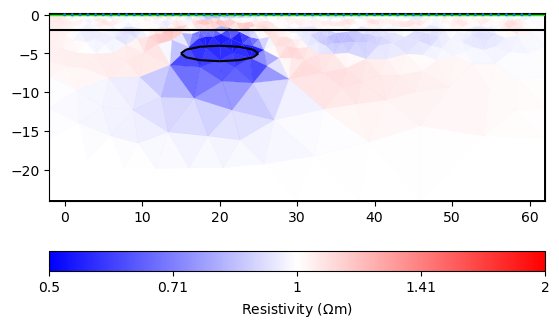

In [51]:
model2 = mgr.invert(data2, lam=300, startModel=model0, isReference=True, verbose=True)
ratio = model2 / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo2, fillRegion=False, fitView=False);

We could, of course, also take model1 as a reference.

07/06/23 - 16:15:13 - pyGIMLi - INFO - Starting inversion.
07/06/23 - 16:15:13 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A9AD84A8B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A9AD84A9F0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A9B7F65DC0>
min/max (data): 51.57/491
min/max (error): 2%/2.05%
min/max (start model): 50.28/606
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.51 (dPhi = 94.43%) lam: 70
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.84 (dPhi = 39.25%) lam: 70.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.84)                   #
################################################################################


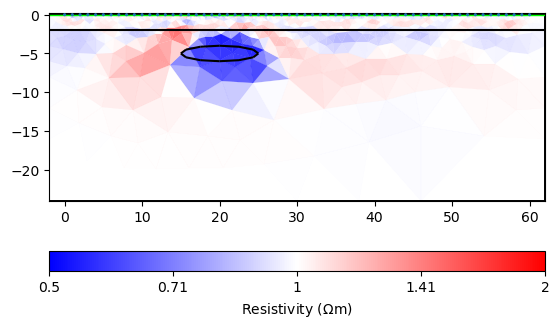

In [52]:
model2 = mgr.invert(data2, lam=70, startModel=model1, isReference=True, verbose=True)
ratio = model2 / model1
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo2, fillRegion=False, fitView=False);

and see both the decrease of the second anomaly as well as the increase of the first one back to background.

## Full timelapse inversion

Instead of inverting single timesteps (frames) step by step, we want to invert all data simultaneously with constraints both in the individual frame and along frames.

In [41]:
from pygimli.frameworks import MultiFrameModelling

fop = MultiFrameModelling(ert.ERTModelling)
DATA = [data, data1, data2]
fop.setData(DATA)
fop.setMesh(mgr.mesh)
print(fop.parameterCount)

04/06/23 - 17:34:41 - pyGIMLi - INFO - Found 2 regions.
04/06/23 - 17:34:41 - pyGIMLi - INFO - Region with smallest marker (1) set to background
04/06/23 - 17:34:41 - pyGIMLi - WARNING - Parameter count is 0


0


The data vector comprises all data vector and the error vector alike.

In [33]:
dataVec = np.concatenate([data["rhoa"] for data in DATA])
errorVec = np.concatenate([data["err"] for data in DATA])
startModel = fop.createStartModel(dataVec)
# fop.setStartModel(startModel)  # needed if fop.createStartModel not implem.

In [34]:
models = np.reshape(startModel, (len(DATA), -1))
print(models.shape, models[0].shape)

(3, 0) (0,)


In [39]:
bla = ert.ERTModelling()
bla.setData(data)
bla.setMesh(mgr.mesh)
blu = bla.response(models[0])
print(blu)

04/06/23 - 17:33:55 - pyGIMLi - INFO - Found 2 regions.
04/06/23 - 17:33:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/06/23 - 17:33:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/06/23 - 17:33:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/06/23 - 17:33:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2761 Cells: 5200 Boundaries: 4060


RuntimeError: ./core/src/vector.h:1501		T GIMLI::min(const Vector<ValueType2>&) [with T = double]  array size is zero.

In [31]:
# for f in fop.fops:
#     f.setMeshPost(mesh)

In [38]:
fop0 = fop.fops[0]
fop0.response(models[0])

04/06/23 - 17:33:33 - pyGIMLi - INFO - Creating forward mesh from region infos.


RuntimeError: RegionManager knows no mesh.

In [36]:
resp = fop.response(startModel)
print(resp)

04/06/23 - 17:32:52 - pyGIMLi - INFO - Creating forward mesh from region infos.


RuntimeError: RegionManager knows no mesh.

In [ ]:
inv = pg.Inversion(fop=fop, verbose=True)
fop.createConstraints()
# inv.setRegularization(C=fop.C)  # here we could also do other things?
# inv.startModel = 100
model = inv.run(dataVec, errorVec, maxIter=10, startModel=startModel)


04/06/23 - 16:54:11 - pyGIMLi - WARNING - Parameter count is 0
04/06/23 - 16:54:11 - pyGIMLi - WARNING - Parameter count is 0
04/06/23 - 16:54:11 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.convertStartModel(c:\Guenther.T\src\gimli\gimli\pygimli\frameworks\inversion.py:224)
Starting model size invalid 3054 != 0.
04/06/23 - 16:54:11 - pyGIMLi - INFO - Created startmodel from forward operator: 3054 [280.2211004867538,...,280.2211004867538]
04/06/23 - 16:54:11 - pyGIMLi - INFO - Starting inversion.
04/06/23 - 16:54:11 - pyGIMLi - INFO - Creating forward mesh from region infos.


fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x0000011AAECF69F0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000011AAEBC7B80>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000011AAECF6AE0>
min/max (data): 47.8/491
min/max (error): 2%/2.06%
min/max (start model): 280/280
--------------------------------------------------------------------------------


RuntimeError: RegionManager knows no mesh.